In [51]:
import seaborn as sns
import sklearn
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [41]:
#1. Вивести перших 5 рядків.(та завантажити датасет)
data = load_diabetes()
X, y = data.data, data.target
df = pd.DataFrame(data=X, columns=data.feature_names)
df['target'] = y

print("Перші рядки даних:")
print(df.head())

Перші рядки даних:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [64]:
# 2. Перевірити наявність пропусків. У разі виявлення замінити на середнє значення.
missing_values = df.isnull().sum()
print("Пропущені значення :\n", missing_values)

Пропущені значення :
 age         0
sex       442
bmi         0
bp          0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
target      0
dtype: int64


In [70]:
#3. Перевірити наявність дублікатів, при виявленні – видалити.
duplicates = df.duplicated().sum()
print("\nКількість дублікатів:", duplicates)


Кількість дублікатів: 0


In [71]:
#4. Замінити бінарні ознаки. У стовпчику «стать» спочатку перевірте унікальні значення.
unique_values = df['sex'].unique()
print(unique_values)


[nan]


In [44]:
#5. Перевірити тип даних. При необхідності замінити тип даних на числовий.
data_types = df.dtypes

print("\nТипи даних:\n", data_types)


Типи даних:
 age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


In [45]:
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [46]:
#6. Обчислити кореляцію між прогресом діабету і іншмим ознаками. Розташувати в порядку спадання.Побудувати теплову карту кореляції.
correlation_matrix = df.corr()

tip_correlation = correlation_matrix['target']

sorted_tip_correlation = tip_correlation.sort_values(ascending=False)

print(sorted_tip_correlation)

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


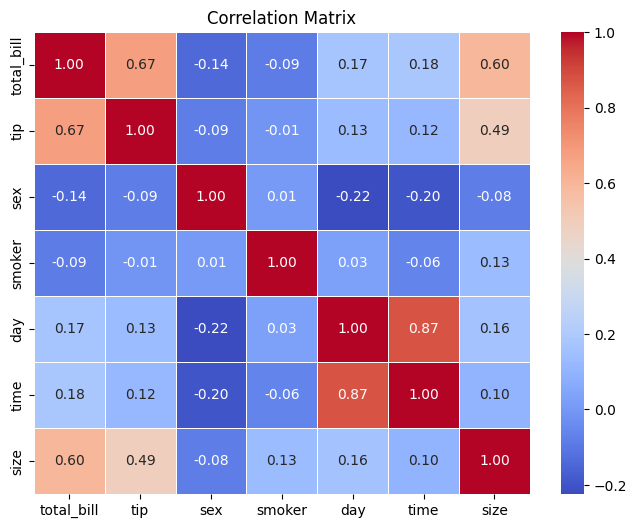

In [11]:
import matplotlib.pyplot as plt
# Візуалізація теплової карти кореляції
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [49]:
#7. Масштабувати ознаки.
X = df.drop('target', axis=1)
y = df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
#8. Поділити дані на тренувальну і тестову вибірки.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [56]:
#9. Побудувати модель лінійной регресії і RandomForest регресії на основі більш корелюючих ознак (підібрати оптимальне число).
in_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)

# Побудова та оцінка моделі RandomForest регресії
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Середня квадратична помилка лінійної регресії: {mse_lin:.2f}")
print(f"Середня квадратична помилка RandomForest регресії: {mse_rf:.2f}")

Середня квадратична помилка лінійної регресії: 2900.19
Середня квадратична помилка RandomForest регресії: 2963.01


In [57]:
#10. Вивести коефіцієнт детермінації і середньоквадратичну помилку.
print(f"Лінійна регресія:")
print(f"  Середня квадратична помилка (MSE): {mse_lin:.2f}")
print(f"  Коефіцієнт детермінації (R²): {r2_lin:.2f}")

print(f"RandomForest регресія:")
print(f"  Середня квадратична помилка (MSE): {mse_rf:.2f}")
print(f"  Коефіцієнт детермінації (R²): {r2_rf:.2f}")

Лінійна регресія:
  Середня квадратична помилка (MSE): 2900.19
  Коефіцієнт детермінації (R²): 0.45
RandomForest регресія:
  Середня квадратична помилка (MSE): 2963.01
  Коефіцієнт детермінації (R²): 0.44


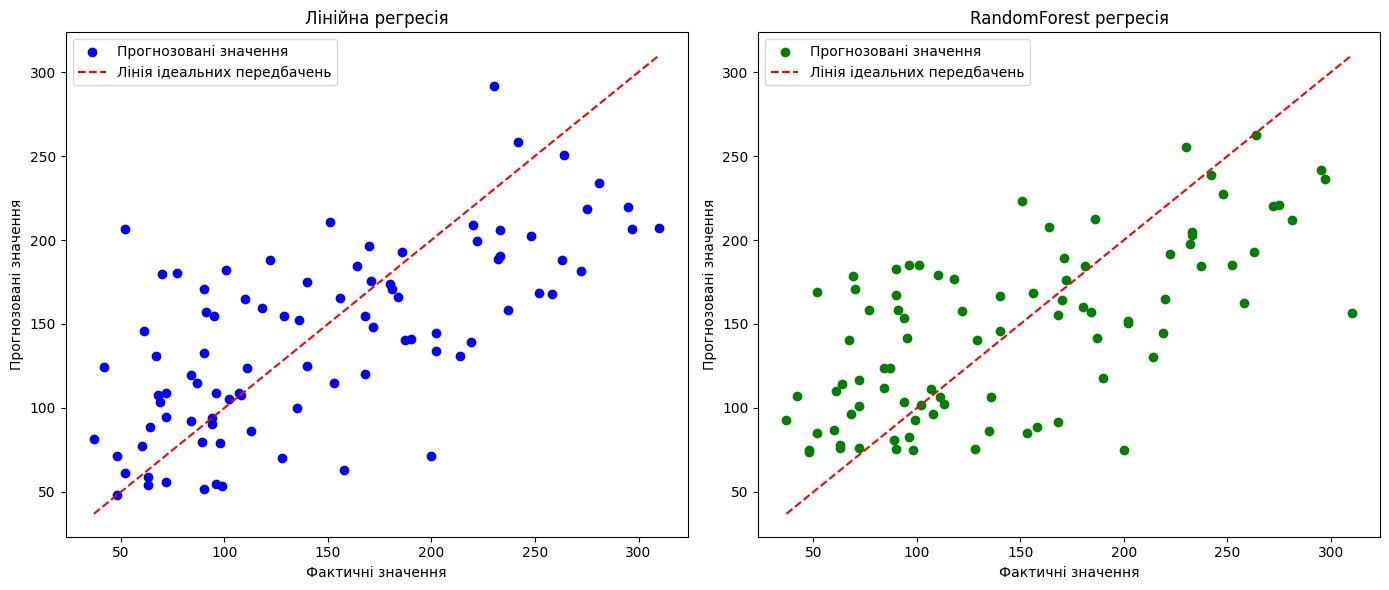

In [58]:
#11. Побудувати графіки.


plt.figure(figsize=(14, 6))

# Графік для лінійної регресії
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin, color='blue', label='Прогнозовані значення')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Лінія ідеальних передбачень')
plt.xlabel('Фактичні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Лінійна регресія')
plt.legend()

# Графік для RandomForest регресії
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, color='green', label='Прогнозовані значення')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Лінія ідеальних передбачень')
plt.xlabel('Фактичні значення')
plt.ylabel('Прогнозовані значення')
plt.title('RandomForest регресія')
plt.legend()

plt.tight_layout()
plt.show()


In [59]:
#12. Вивести справжні і прогнозовані значення.

print("Лінійна регресія:")
print(f"Фактичні значення: {y_test.values[:10]}")
print(f"Прогнозовані значення: {y_pred_lin[:10]}")

print("\nRandomForest регресія:")
print(f"Фактичні значення: {y_test.values[:10]}")
print(f"Прогнозовані значення: {y_pred_rf[:10]}")

Лінійна регресія:
Фактичні значення: [219.  70. 202. 230. 111.  84. 242. 272.  94.  96.]
Прогнозовані значення: [139.5475584  179.51720835 134.03875572 291.41702925 123.78965872
  92.1723465  258.23238899 181.33732057  90.22411311 108.63375858]

RandomForest регресія:
Фактичні значення: [219.  70. 202. 230. 111.  84. 242. 272.  94.  96.]
Прогнозовані значення: [144.66 171.05 150.62 255.36 106.39 123.51 238.99 220.16 153.44 185.15]


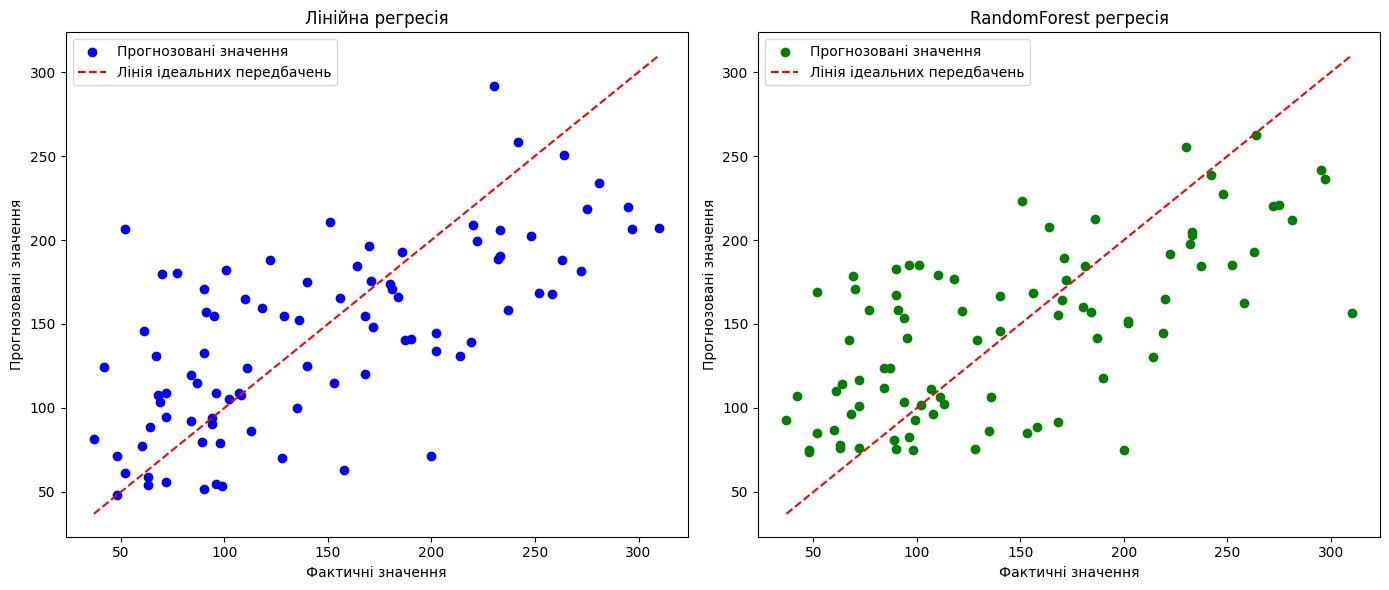

In [60]:
#12. Вивести справжні і прогнозовані значення.

plt.figure(figsize=(14, 6))

# Графік для лінійної регресії
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin, color='blue', label='Прогнозовані значення')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Лінія ідеальних передбачень')
plt.xlabel('Фактичні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Лінійна регресія')
plt.legend()

# Графік для RandomForest регресії
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, color='green', label='Прогнозовані значення')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Лінія ідеальних передбачень')
plt.xlabel('Фактичні значення')
plt.ylabel('Прогнозовані значення')
plt.title('RandomForest регресія')
plt.legend()

plt.tight_layout()
plt.show()
